# Subset

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
import matplotlib.pyplot as plt
import seaborn as sns
print(ad.__version__)

0.11.4


In [13]:
adata = ad.read_h5ad("C:/Users/Tycho/Desktop/SchoolTU/year3/q4_RP/data/0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad", backed='r')
print(adata)

AnnData object with n_obs × n_vars = 1058909 × 36169 backed at 'C:\\Users\\Tycho\\Desktop\\SchoolTU\\year3\\q4_RP\\data\\0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad'
    obs: 'reference_genome', 'gene_annotation_version', 'alignment_software', 'intronic_reads_counted', 'library_id', 'assay_ontology_term_id', 'sequenced_fragment', 'cell_number_loaded', 'institute', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_id', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_collection_method', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'cell_viability_percentage', 'suspension_uuid', 'suspension_type', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gen

In [14]:
# Create a subset of the erythrocyte type
erythrocyte = adata[adata.obs['cell_type'] == 'erythrocyte'].to_memory()
print(erythrocyte)

AnnData object with n_obs × n_vars = 141 × 36169
    obs: 'reference_genome', 'gene_annotation_version', 'alignment_software', 'intronic_reads_counted', 'library_id', 'assay_ontology_term_id', 'sequenced_fragment', 'cell_number_loaded', 'institute', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_id', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_collection_method', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'cell_viability_percentage', 'suspension_uuid', 'suspension_type', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gene', 'TCRa_J_gene', 'TCRa_C_gene', 'TCRb_V_gene', 'TCRb_D_gene', 'TCRb_J_gene', 'TCRb_C_gene', 'TCR_Clonality', 'TCR

c:\Users\Tycho\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Test data created with shape: (100, 50)
Cell types: ['naive thymus-derived CD4-positive, alpha-beta..., 'CD16-positive, CD56-dim natural killer cell, ..., 'CD14-positive monocyte']
Categories (3, object): ['CD14-positive monocyte', 'CD16-positive, CD56-dim natural killer cell, ..., 'naive thymus-derived CD4-positive, alpha-beta...]
Donors: ['donor3', 'donor2', 'donor5', 'donor4', 'donor1']
Categories (5, object): ['donor1', 'donor2', 'donor3', 'donor4', 'donor5']
Age stages: ['40-year-old human stage', '35-year-old human stage', '60-year-old human stage', '50-year-old human stage', '30-year-old human stage']
Categories (5, object): ['30-year-old human stage', '35-year-old human stage', '40-year-old human stage', '50-year-old human stage', '60-year-old human stage']


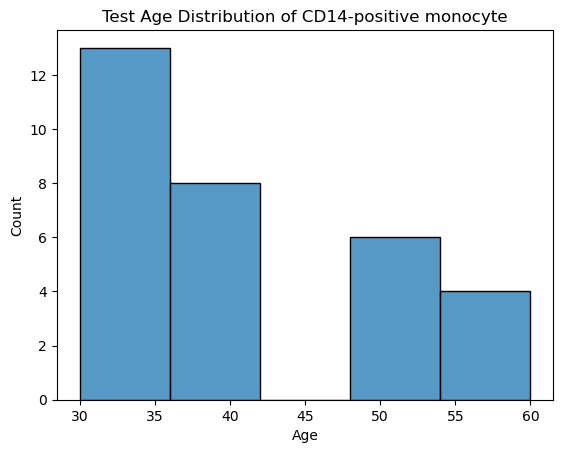

In [28]:
def create_test_data():
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Create a small test dataset with 3 cell types and 5 donors
    n_cells = 100
    n_genes = 50
    
    # Generate random expression data (sparse matrix)
    X = np.random.negative_binomial(5, 0.3, size=(n_cells, (n_genes-2)))
    X = np.concatenate([X, np.zeros((n_cells, 2))], axis=1)  # Add two zero columns
    X = csr_matrix(X)

    cell_type = np.random.choice(['CD14-positive monocyte', 
                                   'naive thymus-derived CD4-positive, alpha-beta T cell',
                                   'CD16-positive, CD56-dim natural killer cell, human'], 
                                  size=n_cells)
    
    choices_donor_and_age = [('donor1', '30-year-old human stage'),
                             ('donor2', '35-year-old human stage'),
                             ('donor3', '40-year-old human stage'),
                             ('donor4', '50-year-old human stage'),
                             ('donor5', '60-year-old human stage')]
    
    indexes = np.random.choice(len(choices_donor_and_age), size=n_cells)
    donor_and_age = [choices_donor_and_age[i] for i in indexes]
    donor_and_age = np.array(donor_and_age)

    
    # Create cell metadata
    obs = pd.DataFrame({
        'cell_type': cell_type,
        'donor_id': [donor for donor, _ in donor_and_age],
        'development_stage': [age for _, age in donor_and_age],
    })
    
    # Create gene metadata
    var = pd.DataFrame(index=[f'gene_{i}' for i in range(n_genes)])
    
    # Create the AnnData object
    adata = ad.AnnData(X=X, obs=obs, var=var)
    
    return adata

# Create test data
test_data = create_test_data()

# Save to file
test_data.write_h5ad("test_data.h5ad")

# Verify the structure
print("Test data created with shape:", test_data.shape)
print("Cell types:", test_data.obs['cell_type'].unique())
print("Donors:", test_data.obs['donor_id'].unique())
print("Age stages:", test_data.obs['development_stage'].unique())

# Plot age distribution for one cell type to test visualization
celltype = 'CD14-positive monocyte'
subset = test_data[test_data.obs['cell_type'] == celltype]
string_age = subset.obs['development_stage'].astype(str)
string_age = string_age.str.extract('(\d+)').astype(int).squeeze()
sns.histplot(string_age, bins=5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title(f'Test Age Distribution of {celltype}')
plt.show()

In [29]:
# Print the first few rows of the test data
print(test_data.obs.head())

                                           cell_type donor_id  \
0  naive thymus-derived CD4-positive, alpha-beta ...   donor3   
1  CD16-positive, CD56-dim natural killer cell, h...   donor2   
2                             CD14-positive monocyte   donor2   
3  CD16-positive, CD56-dim natural killer cell, h...   donor5   
4  naive thymus-derived CD4-positive, alpha-beta ...   donor3   

         development_stage  
0  40-year-old human stage  
1  35-year-old human stage  
2  35-year-old human stage  
3  60-year-old human stage  
4  40-year-old human stage  


In [30]:
# Print test data .x
print("Test data .x shape:", test_data.X.shape)

for i in range(100):
    # if the donor_id is 1 print the row
    if test_data.obs['donor_id'].iloc[i] == 'donor1':
        # If the cell_type is 'CD14-positive monocyte' print the row
        if test_data.obs['cell_type'].iloc[i] == 'CD14-positive monocyte':
            print(f"Test data .x row {i} (dense):", test_data.X[i].A.flatten())

Test data .x shape: (100, 50)
Test data .x row 11 (dense): [ 7.  8. 17.  9. 20.  8.  9.  7. 12. 17. 16.  9.  9. 21.  6. 12.  4. 12.
 13. 37. 13.  4. 10. 13. 15.  6. 15.  4.  7. 11. 10. 21.  7.  6. 18. 15.
  5.  8.  6. 20. 12. 17. 12. 19.  9. 13.  7. 21.  0.  0.]
Test data .x row 18 (dense): [17.  3. 13.  6. 19. 11. 12.  6. 11. 12. 10. 13.  8. 15. 14.  3. 12. 10.
 11.  4. 24. 14.  5. 31.  2.  4. 14. 11.  9. 19. 14. 10.  1.  7.  5. 17.
 12. 19. 12.  8. 13. 15. 14.  6. 12.  0. 21. 11.  0.  0.]
Test data .x row 20 (dense): [ 1. 14. 11. 11. 14.  6. 10. 21.  9.  7.  6.  4. 11. 23.  8.  0.  3. 21.
 15.  7.  9.  7. 16. 14. 23. 13.  9.  5. 16. 10.  5. 11.  7. 10.  8.  6.
  2. 14.  7.  2. 13.  6.  2.  8.  8. 10. 24.  7.  0.  0.]
Test data .x row 24 (dense): [ 0. 11.  5. 14. 16. 13. 28. 12. 14.  3. 11. 10.  6.  9. 16. 16. 15.  4.
  6.  6.  7.  7.  5. 11. 14. 10. 14. 12.  7. 11. 15. 11. 13.  3.  6. 18.
 14. 20. 14. 10. 21. 19.  9.  9. 15.  6.  7. 10.  0.  0.]
Test data .x row 26 (dense): [ 5. 15. 

In [2]:
# Load subsets/CD14-positive monocyte_old_donors.h5ad
adata = ad.read_h5ad("CD14-positive monocyte_young_donors.h5ad")

In [3]:
# Print the .x data of the first column
print("Subsets .x shape:", adata.X.shape)
adata.X[:, 0]

Subsets .x shape: (2, 48)


array([8.33333333, 7.28571429])

In [4]:
# Print metadata
print("Subsets metadata shape:", adata.obs.shape)
print("Subsets metadata:", adata.obs.head())

Subsets metadata shape: (2, 3)
Subsets metadata:                        cell_type        development_stage  n_cells
donor_id                                                          
donor2    CD14-positive monocyte  35-year-old human stage        6
donor1    CD14-positive monocyte  30-year-old human stage        7
